#  Car Price prediction 

### Problem Statement:
The Aim of this project is to build or develop a Machine Learning model to predict the price of used car at reasonable rate. In this model we used Random Forest Regressor to predict price of used car based on its features like manufacturing years, showroom price, kilometer driven, fuel types, number of sellers, transmission types & owners etc. A customer or buyer or seller may know actual market price or values before purchasing or selling of his/her car. In this project we implement and evaluate various learning methods of machine learning on this dataset.

### Dataset Description & data sourse:
- This data we get from www.cardekho.com.
- This dataset is also available on kaggle for free.

### Features Information:
- **Car_Name**: Give the information of car Name.
- **Year**: Give the information about Manufacturing year of car.
- **Selling_Price**:Give the information about selling price.
- **Present_Price**:Give the information about present price in showroom.
- **Kms_Driven**:Give the information about car driven in km.
- **Fuel_Type**:Give the information about which type of fuel is used Petrol ,Diesel or CNG.
- **Seller_Type**: Give the information about seller_type Dealer or Individual.
- **Transmission**:Give the information about Transmission system whether is Manual or Automatic.
- **Owner**:Give the information about Owner 0, 1, 0r 3.

### Workflow:
1. Import all libraries
2. Load dataset
3. Check missing values or duplicate rows
4. Data Exploration
5. Perform data visualization
6. Model fitting
7. Feature extraction
8. Prediction
9. Deploy the model
10. Conclusion

### 1.Import all libraries


In [3]:
import numpy as np          # for numerical python
import pandas as pd           #for manupulation data
import seaborn as sns         # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
import pickle

### 2.Load Data

In [4]:
car = pd.read_csv('car data.csv')

In [5]:
car.head() # load data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Shape of Data

In [6]:
car.shape # to shows no. of rows and feature

(301, 9)

- There are 301 rows and 9 features in this dataset

In [7]:
# checking unique values in each columns

print(car['Seller_Type'].unique())
print(car['Transmission'].unique())
print(car['Owner'].unique())
print(car['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


#### Looking for summary

In [8]:
# number of columns we have
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
 car.info()         # for shows information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
car.describe() # to show statistical features

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### 3.Check missing and null values

In [11]:
car.isnull().sum() # for count the number of missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### Here no null or empty values present in our data

### Checking duplicated rows and remove it.

In [12]:
car.duplicated().sum()       # to shows the count of dupbicate rows

2

In [13]:
car[car.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


- Here 2 duplicate rows ,so remove it. 

In [14]:
#droping duplicated rows
car=car.drop_duplicates()
car.shape

(299, 9)

- 2 rows removed successfully.

In [15]:
#checking duplicaterows again
car.duplicated().sum()

0

### 4. Data Exploration

In [16]:
#Create new dataframe with skip car-name its jugde to which price is best.

car_dataset = car[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### create new derived  feature to know how many years is car old
### Add Current_year = '2023' column

In [17]:
car_dataset['Current_year']=2023

In [18]:
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


#### Add new column Number of year column = Current_year - Year
- No.of_year = gives how many years cars is old.

In [19]:
car_dataset['No.of_year'] = car_dataset['Current_year'] - car_dataset['Year']
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No.of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


#### Delete 'Year'  & Current_year column  no neet this featurs for prediction.

In [20]:
car_dataset.drop(['Year'],axis=1,inplace=True)

car_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No.of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10


In [21]:
#### Delete 'Current_Year' column also.
car_dataset.drop(['Current_year'],axis=1,inplace=True) 
car_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No.of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


#### convert categorical data into dummy indicator variable
**pd.get_dummies**:It is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [22]:
car_dataset=pd.get_dummies(car_dataset,drop_first=True)
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


### 5.Perform data visualization 

#### Corretation between features

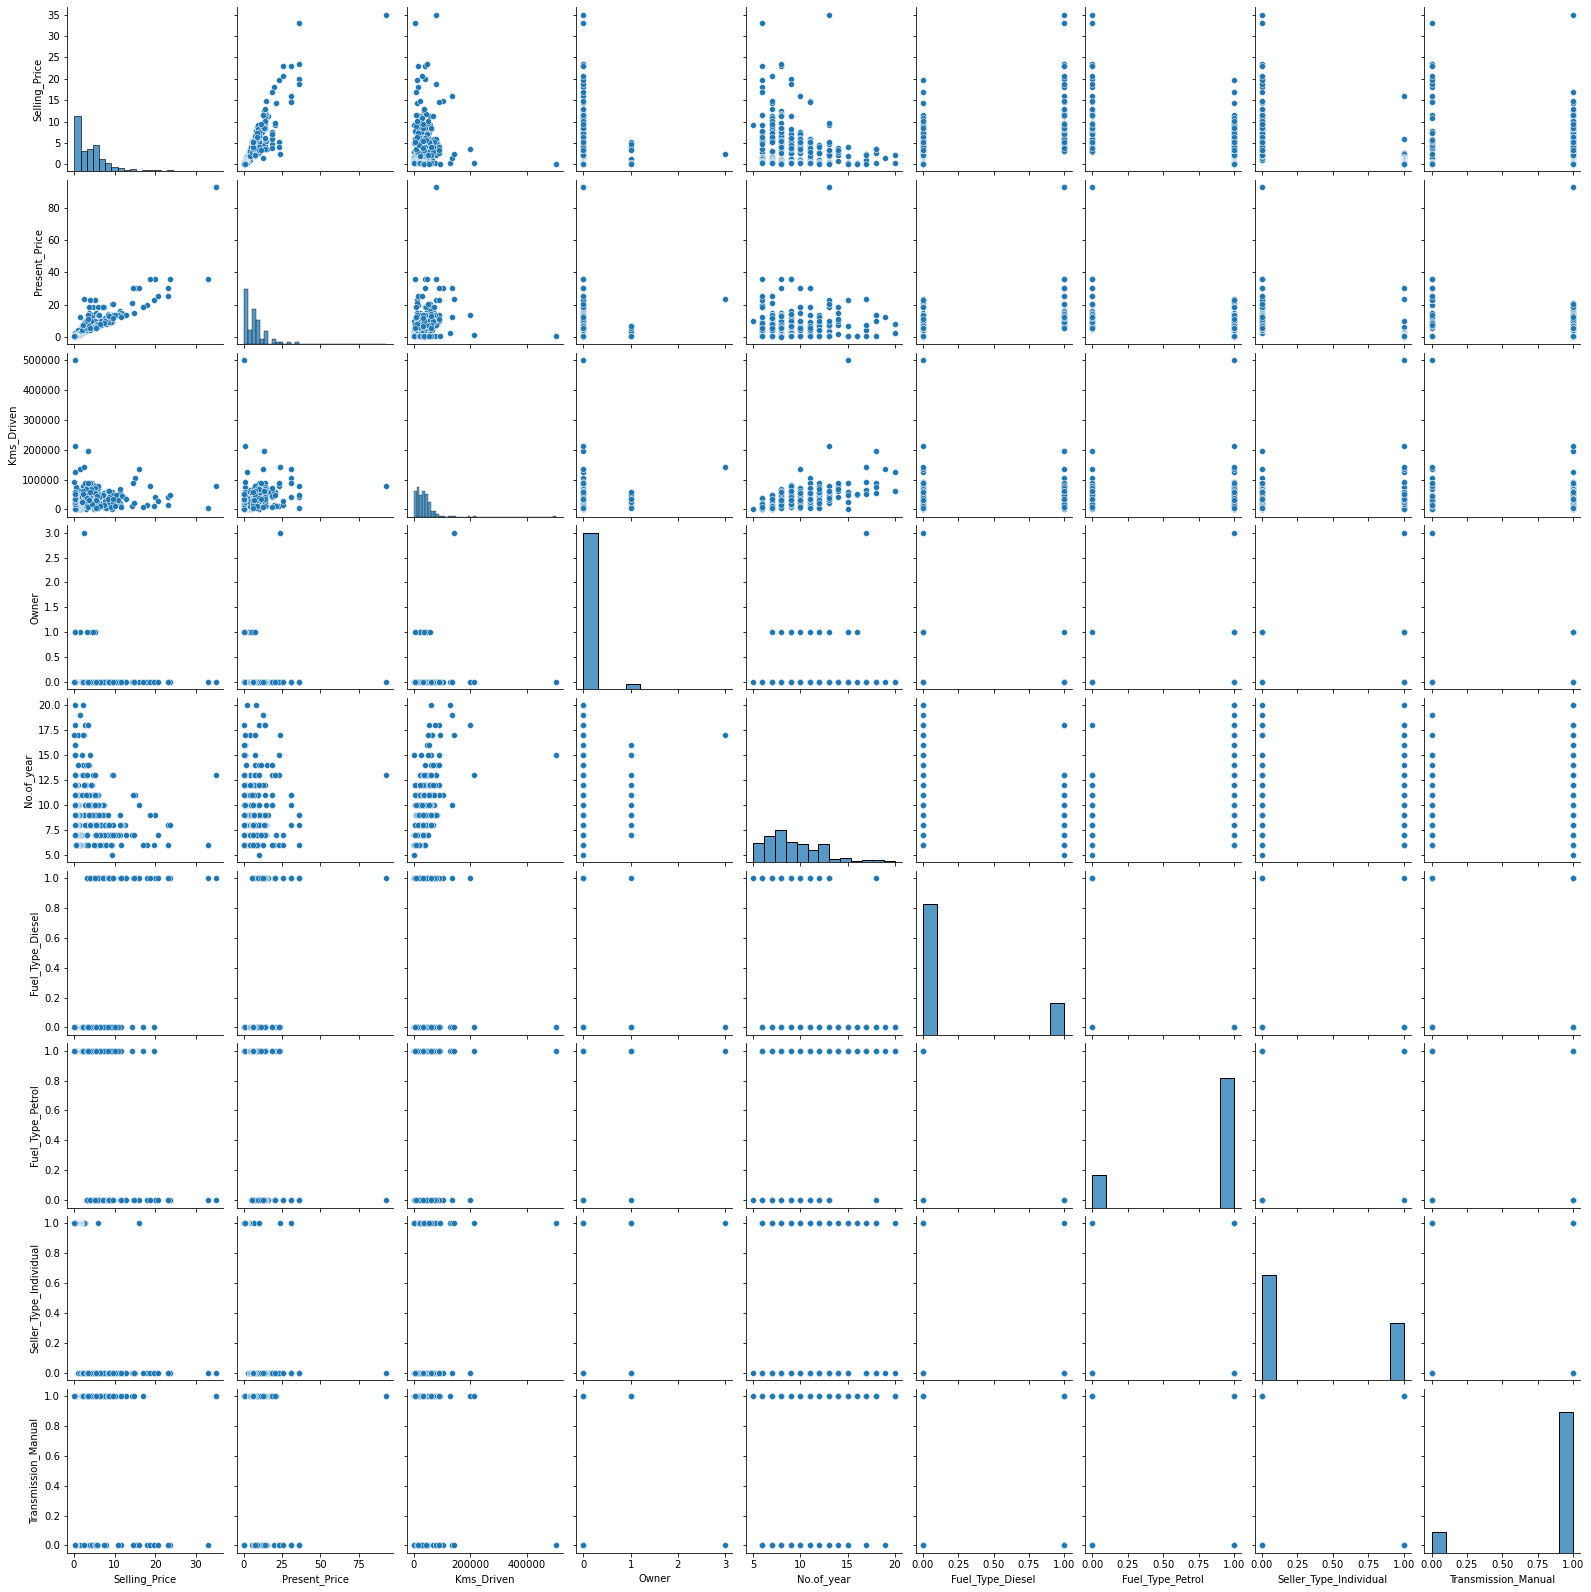

In [23]:
#draw pairplot= Seaborn Pairplot uses to get the relation between each and every variable present in Pandas DataFrame

sns.pairplot(car_dataset)

In [24]:
corr = car_dataset.corr()
corr

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876378,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876378,1.000000,0.205253,0.009947,0.053563,0.464849,-0.456746,-0.511686,-0.334265
Kms_Driven,0.028566,0.205253,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009947,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
No.of_year,-0.234369,0.053563,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.543541,0.464849,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456746,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Seller_Type_Individual,-0.553851,-0.511686,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334265,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


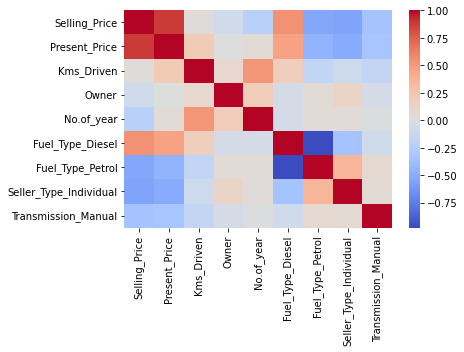

In [25]:
# Using heatmap for correlation between features
sns.heatmap(corr,cmap="coolwarm") #coolwarm=warm color in colormap
plt.show()

<AxesSubplot:>

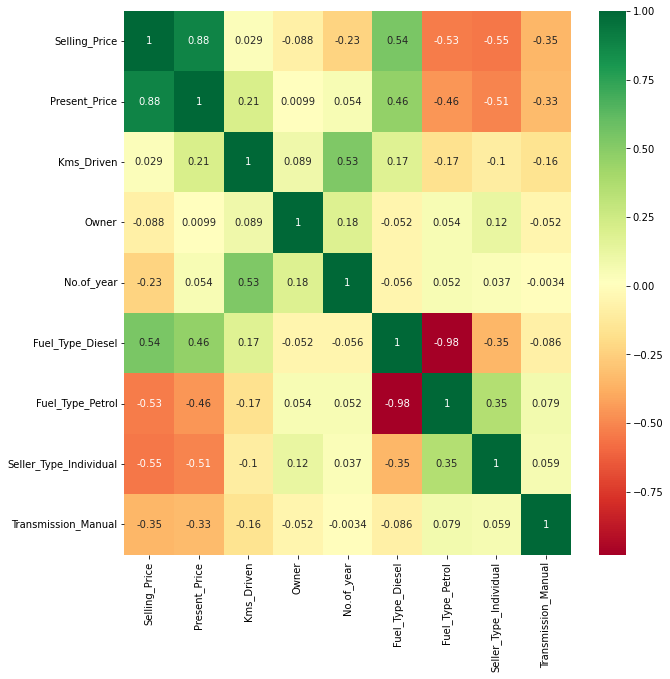

In [26]:
#plot heatmap for top_corelation features

top_corr_features = corr.index
plt.figure(figsize=(10,10))

sns.heatmap(car_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Obervation**:
- Dark green color shows positively correlated ,so selling price is directly correlated with transmittion system.
- Red color shows negative corelation between fuels.

### 6.Model fitting

In [27]:
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [28]:
# Independent and dependent features:
#selling price is dependent feature & all are independent features.
X = car_dataset.iloc[:,1:]

y = car_dataset.iloc[:,0]

In [29]:
X.head()

,Present_Price,Kms_Driven,Owner,No.of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [30]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [31]:
# feature Importance

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [32]:
print(model.feature_importances_)

[4.49045537e-01 3.88458541e-02 3.92417995e-04 8.38046026e-02
 8.50007016e-02 2.25654469e-02 2.30147208e-01 9.01982311e-02]


**Insight**s:
- present price is having most highest important feature


### Plot graph of feature importances for better visualization


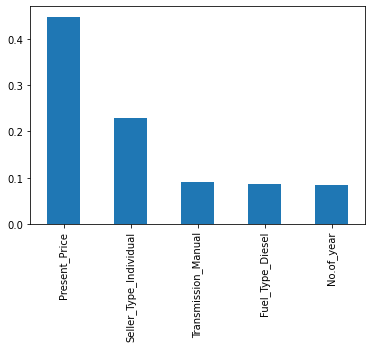

In [33]:
#to show top 5 important feature
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='bar')
plt.show()

**Oberservation**: Present price is so high.
- Above all are the most impotant features. i.e 
- present_price,seller_types,Transmission,fual_types & Number of year car used.

### 7.Feature extraction

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
X_train.shape

(239, 8)

- So we have 8 feauteres for prediction.

### Implement random forest regressor

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_Random = RandomForestRegressor()

### Hyperparameters:
The hyperparameters are different parameter values that are used to control the learning process and have a significant effect on the performance of machine learning models.

**Hyperparameter optimization** is the process of finding the right combination of hyperparameter values to achieve maximum performance on the data in a reasonable amount of time.
- n_estimators

In [37]:
n_estimators=[int(x) for x in np.linspace(start = 100,stop=1200,num=12)] # Desision trees 100-1200
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


### Randomized Search cv:
- Randomized Search which is used to find the most optimal combination of hyper parameters for coming up with the best model.
- Faster than grid search

In [38]:
# No. of trees in random forest
n_estimators=[int(x) for x in np.linspace(start = 100, stop=1200, num=12)]

# no. of features to consider at every split
max_features=['auto','sqrt']

#Max no of level in trees
max_depth=[int(x) for x in np.linspace(5,30, num=6)]

# maxDepth.appends(None)
# minimum no of samples req to split a node

min_samples_split=[2,5,10,100]

# minimum no of samples req at each leaf node
min_samples_leaf = [1,2,5,10]

In [39]:
### Create the random grid
from sklearn.model_selection import RandomizedSearchCV

In [40]:
random_grid = {'n_estimators':n_estimators,
                "max_features":max_features,
                "max_depth":max_depth,
                "min_samples_split":min_samples_split,
                'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:
### Use the random grid to search for best hyperparameters
### First create the base model to tune
# Using crossvalidation

In [42]:
rf = RandomForestRegressor()

In [43]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions =random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [44]:
# fit function is used to train the model using the training sets as parameters

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   7.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   4.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   3.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [46]:
rf_random.best_score_

-2.8554965096979275

In [47]:
rf_random.score(X_test,y_test)

-10.144469050121812

### 8.Prediction

In [48]:
#Performing prediction on test dataset
preds=rf_random.predict(X_test)
preds

array([ 7.47178116,  0.66228445,  0.59709829, 16.00821457,  0.97536224,
        0.73159739,  7.46341777,  3.1596272 ,  0.62368341,  3.74808167,
        3.02899279,  0.68475655,  0.90166431,  0.55984845,  3.10709446,
       10.45129878,  6.14610968,  7.48790007,  5.84525939,  4.6245993 ,
        0.97110841,  7.21696146,  5.77268708,  1.18307329,  0.52672686,
        6.93947073,  0.83073958,  4.54476927,  9.27313734,  6.7964024 ,
        3.73860684,  0.76212935,  0.73448699,  0.5994958 ,  4.53373029,
        7.49699969,  1.18242012,  5.22417232, 12.51255926,  2.80765292,
        0.76418269,  3.19234169,  0.46343711,  1.2257173 ,  4.52641414,
        0.73432452,  0.91199019,  6.83009441,  9.08368668,  9.19944032,
        7.2525663 ,  8.12101544,  8.82716182,  4.76161506,  5.11822082,
        8.22646772,  5.88371491,  7.06088868,  5.04448714,  4.08888268])

F:\my apps\anaconda\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

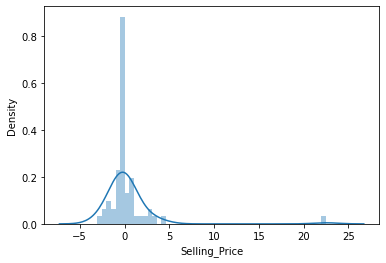

In [49]:
#using distplot for 
sns.distplot(y_test-preds)

**Observation**: We get normal gaussian distribution , its mean our model gives us very good results.

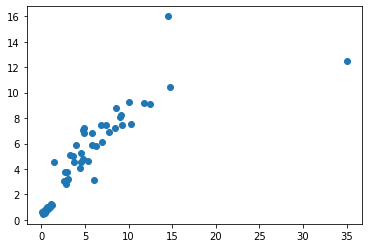

In [50]:
plt.scatter(y_test,preds)

**obeservation**:  ploting is linearly availabel thats means our prediction is prety much good.
     

In [51]:
# mean sq _error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds)
mse

10.144469050121812

In [52]:
np.sqrt(mse)

3.1850383121905788

### Pickle this file 

**Pickle** 
- It can be a machine learning algorithms or object.
- It is the standard way of serializing objects in Python for deployment.
- The pickle operation to serialize your machine learning algorithms and save the serialized format to a file.
- Later you can load this file to deserialize your model and use it to make new predictions.

In [53]:
import pickle

In [54]:
#open the file,where you are to store the data
file = open('random_forest_regression_model.pkl','wb')

In [55]:
# dump information to that file
pickle.dump(rf_random, file)

### Creating requirement.txt file 
- Python requirements files are a great way to keep track of the Python modules. It is a simple text file that saves a list of the modules and packages required by your project.


In [56]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install -r requirements.txt


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.
Processing c:\ci\aiohttp_1646806572557\work



ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\ci\\aiohttp_1646806572557\\work'



* Model file is created successfully.

### For Frontend ,Here I am using Spyder IDE.

### Then for deploaying using netlify .

### Thank you! continue Exploring!!